# Text Classification

In this chapter, we'll go over how to perform *text classification* with Python. As another form of natural language processing, text classification will allow us to automatically assign a set of pre-determined categories, or tags, to  unstructured texts.

## Setup

We'll get started by installing `matplotlib` and importing `pandas`.

In [1]:
%matplotlib inline

import pandas as pd

### Data

As an example, we'll be looking at a dataset containing [reviews](https://www.kaggle.com/zynicide/wine-reviews/data) from Wine Enthusiast magazine.  

In [2]:
#https://www.kaggle.com/zynicide/wine-reviews/data

wine_df = pd.read_csv('wine_reviews.csv')


We can quickly get a sense of the distribution of reviews by looking at the `value_counts` associated with different `point` scores.

In [3]:
wine_df['points'].value_counts()

87     16933
86     12600
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

It could also be helpful for us to read over a few of the `descriptions` of the wines. However, since `pandas` defaults to a maximum column width of 50 characters, it's difficult to glean much from each review without specifying a longer maximum character width for the columns in our dataframe. 

In [4]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object

![google_search.png](images/google_search.png)

We'll use the `set_options` function in `pandas` to set our maximum column width to 120 characters.

In [5]:
pd.set_option('display.max_colwidth', 120)



Now we'll have more text to work with when we're looking at the first five descriptions:

In [6]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripen...
1    This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red be...
2    Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity...
3    Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of ...
4    Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal ...
Name: description, dtype: object

We can also use the `head` function to see all the keys included in the dataframe:

In [7]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripen...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Low
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red be...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,Low
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal ...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,Low


## Classifying Texts in Python

The following sections will walk us through a step-by-step guide of how to classify texts in Python.

#### Turning words into features

In order to classify our texts, we'll need to convert each text document in our corpus into a fixed-length *vector*. We can accomplish this using the [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=vectorizer#sklearn.feature_extraction.text.CountVectorizer) function available through the scikit-learn library. Using `CountVectorizer`, we'll be able to transform the texts in our wine review dataframe into a matrix of token counts. 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer


### 1) Set up your model, fixing any parameters.

`CountVectorizer` can take a number of parameters; while not an exhaustive list, some important parameters are described below. 

#### `CountVectorizer` Parameters

- **lowercase**: Converts all text to lower case. By default, `lowercase` is set to True.


- **ngram_range**: This allows us to restrict the range of n-values for our n-grams. Formatted as a tuple, the first sets the minimum n-value, and the second sets the maximum n-value. By default, `n-gram range` is set to (1,1). (If we leave it alone, we'll only be looking at unigrams.) 


- **stop_words**: We can use this parameter to rule out words that occur 1) too frequently, 2) not frequently enough, and/or 3) fall outside of a threshold term frequency. This can be set the 'english' to use a pre-determined set of stopwords often found in texts written in the English language. We can also provide our own list of stopwords if we so choose. 

> - **max_df**: Allows us to set a maximum threshold on document frequency for our terms incorporated into our vocabulary. By default, `max_df` is set to 1.0. 
> - **min_df**: Allows us to set a minimum threshold on document frequency for our terms incorporated into our vocabulary. By default, `min_df` is set to 1.0. 
> - **max_features**: Allows us to build a vocabulary exclusively from high-frequency terms occuring throughout our corpus. 

For this exercise, we'll convert our text to lower case, look only at unigrams, use "english" stopwords, and set a minimum document frequency for terms of .01.

In [9]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

### 2) Fit your model

We'll `fit` the vectorizer we've created to the `description` key in our wine review dataframe.

`model.fit(X)`

In [10]:
vectorizer.fit(wine_df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

We can use the `len` function to see how many features were generated when applying the vectorizor to our corpus.

In [11]:
len(vectorizer.get_feature_names())

400

### 3) Create new data based on your model

Now we can `transform` the text documents in the `description` key of our wine review dataframe into a document-term matrix. 

In [12]:
review_word_counts = vectorizer.transform(wine_df['description'])

Let's take a look at the value counts for the dummy variable `rating` in our dataframe.
 

In [13]:
wine_df['rating'].value_counts()

Low     51493
High    33635
Name: rating, dtype: int64

### 4) Set up your (second) model, fixing any parameters.

#### Multinomial NB
Also imported from the scikit-learn library, [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html?highlight=multinomialnb#sklearn.naive_bayes.MultinomialNB) uses the naive Bayes algorithm to classify multinomially distributed data. This classifier is well-suited to the token counts we've previously generated with our vectorizer. 


In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
nb_classifier = MultinomialNB()


### 5) Fit your (second) model

Before we `fit` the classifier to our data, we'll have to specify a couple of **parameters**: 

- **X**: These are the *training* vectors for our model. For our wine review data, we'll use our `review_word_counts` as our training vectors.



- **Y**: These are the *target* values for our model. For our wine review data, we'll use the `high_rating` key to determine the target values for our model. 

`model.fit(X)`

`model.fit(X, Y)`

In [41]:
nb_classifier.fit(review_word_counts, wine_df['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

We can now view a list of coefficients associated with each of our features:

In [42]:
nb_classifier.coef_[0]

array([ -7.33467081,  -7.24590289,  -7.19142933,  -7.20616256,
        -7.38885524,  -8.18761044,  -8.89070795, -11.09798286,
        -7.20061213,  -7.24397425,  -6.69237287,  -4.00593826,
        -6.70465667,  -7.24397425,  -7.25950854,  -6.263145  ,
        -6.67477066,  -6.92639671,  -6.56148092,  -6.14471991,
        -6.39337878,  -6.09342661,  -7.16437628,  -4.84345499,
        -6.96645929,  -6.27185332,  -7.04067957,  -3.78998822,
        -6.93484747,  -6.76128647,  -5.86105745,  -7.28728811,
        -6.39585097,  -7.30147274,  -6.26459113,  -5.88949074,
        -6.73083916,  -7.12085331,  -8.99606846,  -9.17839002,
        -6.77928336,  -4.62605818,  -6.80255446,  -7.28127003,
        -6.45534174,  -5.38365017,  -5.85864374,  -4.66095875,
        -6.82131674,  -5.29641393,  -6.28284647,  -5.05147071,
        -7.33256333,  -7.57162234,  -6.77807344,  -5.25233262,
        -6.4614902 ,  -7.22300113,  -7.28127003,  -6.99910314,
        -6.93202261,  -6.6704181 ,  -5.11679824,  -6.92

In [43]:
coeficients = pd.Series(nb_classifier.coef_[0],
                        index = vectorizer.get_feature_names())

`sort_values` lets us view the top terms used to describe the wines reviewed in our corpus. 

In [46]:
coeficients.sort_values(ascending=True)[:20]

2022          -11.097983
beautifully    -9.178390
beautiful      -8.996068
2020           -8.890708
impressive     -8.733704
opulent        -8.667564
velvety        -8.297381
lovely         -8.264770
cellar         -8.248854
focused        -8.222879
potential      -8.187610
2019           -8.187610
tightly        -8.057799
producer       -7.875477
layered        -7.868257
purple         -7.868257
provide        -7.839886
develop        -7.822555
polished       -7.798785
vines          -7.792096
dtype: float64

### Classification Exercise 1

Construct a model of UN speeches to distinquish between those before and after the collapse of the Soviet Union.


### 5) Create new data based on your (second) model

Our classifier can now be used to `predict` whether a wine received a relatively `High` or `Low` rating, based on the words used to describe the wine. 

In [47]:
nb_classifier.predict(review_word_counts)

array(['Low', 'High', 'Low', ..., 'Low', 'High', 'High'], dtype='<U4')

In [48]:
wine_df['prediction']  = nb_classifier.predict(review_word_counts)

We can run a crosstab with `pandas` to quickly get a feel for how accurately our classifier predicts `High` and `Low` reviews:

In [49]:
pd.crosstab(wine_df['rating'], wine_df['prediction'])

prediction,High,Low
rating,,
High,26996,6639
Low,7884,43609


For more detailed visualizations of prediction accuracy, we can import `classification_report`, `confusion_matrix`, and `accuracy_score` from scikit-learn. 

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



With [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score), we can get a numerical indicator of prediction accuracy, rather than just eyeball using a crosstab. We'll need to specify the following:

- **y_true**: The correct labels our model is trying to predict. For this example, we'll set `y_true` to `rating`.  


- **y_pred**:  The labels predicted by our classifier. For this example, we'll set `y_pred` to `prediction`. 

In [51]:
accuracy_score(wine_df['rating'], wine_df['prediction'])

0.8293980828869467

Running a [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix) produces results similar to the crosstab we generated earlier. However, through the us of the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function available through the seaborn library, we can create a visual representation of the degree of prediction accuracy.

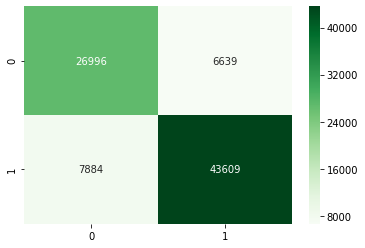

In [52]:
import seaborn as sns

cm = confusion_matrix(wine_df['rating'], wine_df['prediction'])
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


Finally, we can generate a [classification_report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) to return a text report with some helpful classification metrics.

- **Precision**: % of selected items that are correct 



- **Recall**: % of correct items that are selected



In [53]:
print(classification_report(wine_df['rating'], wine_df['prediction']))

              precision    recall  f1-score   support

        High       0.77      0.80      0.79     33635
         Low       0.87      0.85      0.86     51493

    accuracy                           0.83     85128
   macro avg       0.82      0.82      0.82     85128
weighted avg       0.83      0.83      0.83     85128



We can also use our classifer to generate an array of probabilities that each of our features will occur in any given wine review, depending on whether a review is associated with a `High` or `Low` score:

In [54]:
nb_classifier.predict_proba(review_word_counts)

array([[0.05837039, 0.94162961],
       [0.8189896 , 0.1810104 ],
       [0.0073304 , 0.9926696 ],
       ...,
       [0.31987064, 0.68012936],
       [0.92064944, 0.07935056],
       [0.65113375, 0.34886625]])

In [55]:
predict_df = pd.DataFrame(nb_classifier.predict_proba(review_word_counts), 
                          columns=nb_classifier.classes_)

In [56]:
predict_df.head()

,High,Low
0,0.058370,0.941630
1,0.818990,0.181010
2,0.007330,0.992670
3,0.009965,0.990035
4,0.017779,0.982221


In [57]:
wine_df_prediction = pd.concat([wine_df, predict_df], axis = 1)

In [64]:
wine_df_prediction.sort_values('High', ascending=False)[['description','points']].head(15)

,description,points
4661,"A blend of 28% Cabernet Franc, 23% Cabernet Sauvignon, 21% Malbec, 18% Petit Verdot and 10% Merlot, this is a big, b...",94
9681,"A proprietary blend of 57% Merlot, 35% Cabernet Sauvignon and 8% Petit Verdot, all homegrown, this is dense and powe...",94
8339,"Dark, rich mountain blueberry and blackberry form the core of this classically delicious Napa Valley wine from an es...",93
5666,"A beautifully dense, ripe wine, its intense acidity balanced by an opulent structure and gorgeous fruits. The textur...",97
3686,"From one of the top estates in Cahors, this complex, dense wine is both structured and packed with great fruit. At t...",94
9552,"Aged for a year in new wood barrels, this powerful, concentrated wine shows both richness and considerable aging pot...",95
7167,This wine is opulent and rich without losing sight of the freshness of the vintage. Layers of new wood (100%) are bl...,95
2305,"Power and elegance come together in this beautifully proportioned, flavorful and pure-tasting wine. It has depth, co...",94
5380,"A rare reserve-level Cabernet only made once before, this 100% varietal wine hails from esteemed Kiona and Ciel du C...",93
3307,"One of Italy's most acclaimed Merlots, this concentrated wine opens with scents of black currants, cedar, sage and e...",94


In [65]:
wine_df_prediction.sort_values('Low', ascending=False)[['description','points']].head(15)

,description,points
5132,"Colorful and pretty to look at, but a little sweet. The nose has a sweet, maple syrup element along with dry berry f...",86
8134,"Whole-cluster pressed, with 20% Marsanne in the blend, this displays fresh fruit flavors of apple and pear, with a b...",86
4508,Mild citrus aromas come with green notes. This is a medium-level Sauvignon Blanc without a lot of acidic snap. Melon...,85
1744,"Earthy, leafy red-fruit aromas are a bit rustic and burnt-smelling. This solid, chunky Pinot has spicy oak leading s...",86
9226,"The light apple and mild citrus aromas are nice. It feels fresh and medium in intensity, with notes of peach, apple,...",87
6860,"Earthy, meaty and leathery, with an herbal quality to the bouquet. The palate is chunky and soupy, with stewed berry...",87
3220,"Sweet and mild aromas are highlighted by a touch of fresh prune. The mouthfeel is buttery, with plenty of toffee/cof...",87
169,"Saucy tomato and herbal berry aromas are a bit green. This feels creamy and thick, but also bumpy. Oaky, herbal blac...",84
8887,"Sure it's a bit simple and fruity—the flavors run toward berries and citrus—but it's also cleanly made, with a sligh...",84
2435,"Gritty, waxy aromas of pithy citrus and vanilla feed into a fleshy palate with bracing acidity. Light, mild flavors ...",86


### Classification Exercise 2

 Which **post-1989** speech had the highest likelihood of being delivered during an earlier period?


### What about overfitting?

Importing [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) will allow us to set aside a random subset of texts in our corpus to test the fit of our model. We can indicate the proportion of the total body of texts we'd like to set aside for testing the model using the `test_size` parameter. In the following example, we'll set aside 20% of the the wine reviews for testing by setting `test_size` to 0.2.


In [67]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wine_df, test_size=0.2)

In [68]:
len(train)

8000

In [69]:
len(test)

2000

Now that we've split up our data for training and testing, we can set the parameters of our vectorizer, then `fit` the vectorizer to our training data. 

In [70]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

vectorizer.fit(train['description'])


CountVectorizer(min_df=0.01, ngram_range=(1, 2), stop_words='english')

We can use the `transform` method to return a document-term metrix for our training data. 

In [90]:
X_train = vectorizer.transform(train['description'])

Using the MultinomialNB model from we imported earlier in the chapter, we can `fit` the matrix we've generated for descriptions of the wine reviews in the training data to the `rating` dummy variable indicating whether a wine received a high or low rating. 

In [100]:
nb_classifier.fit(X_train, train['rating'])

MultinomialNB()

The visualizations provided through scikitlearn's `classification_report`, `confusion_matrix`, and `accuracy_score` will come in handy as we compare the performance of our model when applied to our training data versus our test data.

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [101]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.841875


Before we can make this comparison, though, we'll have to `transform` our the raw documents in our test data into a document-term matrix. We'll also need to define our prediction model using the testing data. 

In [102]:
test_wf         = vectorizer.transform(test['description'])
test_prediction = nb_classifier.predict(test_wf)

In [103]:
print(accuracy_score(test['rating'], test_prediction))

0.818


In [77]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,3),
                             stop_words = 'english',
                             max_df = .60,
                             min_df = 5,
                             max_features = None)

In [104]:
vectorizer.fit(train['description'])
print(len(vectorizer.get_feature_names()))
X_train = vectorizer.transform(train['description'])
nb_classifier.fit(X_train, train['rating'])


463


MultinomialNB()

In [105]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.841875


In [106]:

print(accuracy_score(test['rating'],
                     nb_classifier.predict(vectorizer.transform(test['description']))))


0.818


### Classification Exercise 3

What happens to your model if you change some of the parameters for your vectorizer? Be sure to spit the data between train and test!


# What about a different model?

In addition to MultinomialNB, we can also import a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) model from scikitlearn.

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
ln_classifier = LogisticRegression()

We can define the parameters of our vectorizer, and fit the vectorizer to the training data in our wine dataframe. This will produce a total of 463 features. 

In [107]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,2),
                             stop_words = 'english',
                             min_df = .01,
                             max_features = None)

vectorizer.fit(train['description'])

print(len(vectorizer.get_feature_names()))
ln_classifier.fit(vectorizer.transform(train['description']), train['rating'])

463


LogisticRegression()

Let's look at the accuracy scores returned for the training and testing data when applying a logistic regression model:

In [108]:
print(accuracy_score(train['rating'],
                     ln_classifier.predict(vectorizer.transform(train['description']))))

0.904125


In [109]:
print(accuracy_score(test['rating'],
                     ln_classifier.predict(vectorizer.transform(test['description']))))

0.8545


We can also see the `heatmap` function from before to get a quick feel for how our model holds up when fit to our test data:

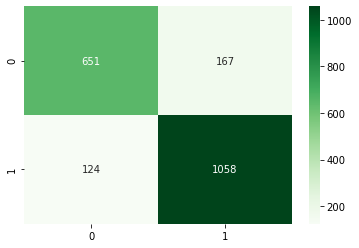

In [111]:
test_prediction = ln_classifier.predict(vectorizer.transform(test['description']))

cm = confusion_matrix(test['rating'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')



### Classification Exercise 4

What is the out sample accuracy of a logistic regression model on your data?

`from sklearn.linear_model import LogisticRegression`

# What about a different model?

![](images/knn1.png)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tf_vector  = TfidfVectorizer(lowercase  =  True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             max_df      = .60,
                             min_df      = .05,
                             max_features = None)

In [89]:
train, test = train_test_split(wine_df, test_size=0.7)

In [90]:
tf_vector.fit(train['description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [91]:
review_tf = tf_vector.transform(train['description'])

In [92]:
knn_classifier.fit(review_tf, train['rating'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
knn_prediction = knn_classifier.predict(review_tf)

In [94]:

print(accuracy_score(train['rating'], knn_prediction))



0.8431748766543974


In [95]:
print(classification_report(train['rating'], knn_prediction))

              precision    recall  f1-score   support

        High       0.84      0.74      0.79      9987
         Low       0.85      0.91      0.88     15551

   micro avg       0.84      0.84      0.84     25538
   macro avg       0.84      0.83      0.83     25538
weighted avg       0.84      0.84      0.84     25538



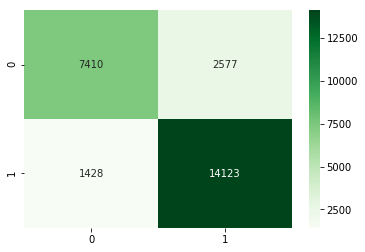

In [96]:
cm = confusion_matrix(train['rating'], knn_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


### Classification Exercise 5

What does a k-nearest neigbhor for your speech dataset look like? (Don't forget to shrink your dataframe). How does the accuracy compare?


![](images/knn2.png)

In [97]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)

# But what's the best fitting model?

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# old model: knn_classifier = KNeighborsClassifier(n_neighbors = 3)

parameters = {'n_neighbors' : [2,3, 7],
              'weights'      : ['distance', 'uniform']}
              

In [88]:
grid = GridSearchCV(KNeighborsClassifier(), 
                    parameters, 
                    cv = 5)

![](images/cv.png)


# But what's the best fitting model?

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
pipeline = Pipeline([
                     ('vectorizer' , CountVectorizer()),
                     ('classifier' , LogisticRegression())
                    ])

parameters = {'vectorizer__max_features' : [300, 500, 700],
               }




In [84]:
grid_search = GridSearchCV(pipeline,
                           parameters,
                           n_jobs = -1,
                           cv = 5,
                           verbose = 1)

In [85]:
grid_search.fit(wine_df['description'],
                wine_df['rating'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   52.7s finished
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                      

In [86]:
grid_search.best_score_

0.8988934310685086

In [87]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=700, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
              

In [88]:
grid_search.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=700, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_clas

### Classification Exercise 6

The "data" folder contains board games descriptions scraped from BoardGameGeeks.com. Analyze the relationship between the words in the `description` and whether or not reviewers thought it was a `quality_game`. 




